In [2]:
import pandas as pd

df = pd.read_csv("MachineLearningCVE.csv")

In [3]:
def initial_eda(data):
    if isinstance(data, pd.DataFrame):
        total_na = data.isna().sum().sum()
        print("Dimensions : %d rows, %d columns" % (data.shape[0], data.shape[1]))
        print("Total NA Values : %d " % (total_na))
        print("%38s %10s     %10s %10s" % ("Column Name", "Data Type", "#Distinct", "NA Values"))
        col_name = data.columns
        dtyp = data.dtypes
        uniq = data.nunique()
        na_val = data.isna().sum()
        for i in range(len(data.columns)):
            print("%38s %10s   %10s %10s" % (col_name[i], dtyp[i], uniq[i], na_val[i]))
        
    else:
        print("Expect a DataFrame but got a %15s" % (type(data)))


initial_eda(df)


Dimensions : 2830743 rows, 79 columns
Total NA Values : 1358 
                           Column Name  Data Type      #Distinct  NA Values
                      Destination Port      int64        53805          0
                         Flow Duration      int64      1050899          0
                     Total Fwd Packets      int64         1432          0
                Total Backward Packets      int64         1747          0
           Total Length of Fwd Packets      int64        17928          0
           Total Length of Bwd Packets      int64        64698          0
                 Fwd Packet Length Max      int64         5279          0
                 Fwd Packet Length Min      int64          384          0
                Fwd Packet Length Mean    float64        99716          0
                 Fwd Packet Length Std    float64       253909          0
                 Bwd Packet Length Max      int64         4838          0
                 Bwd Packet Length Min      int6

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

# Separate the datµ for benign and SSH-Patator connections
benign_data = df[df['Label'] == 'BENIGN']
ssh_patator_data = df[df['Label'] == 'SSH-Patator']



In [5]:
df = df.drop('Init_Win_bytes_backward', axis=1)


In [6]:
labels=df.Label.unique()
columns = df.columns[:-1]




In [7]:

column_dict= {column : 0 for column in columns} 

for column in columns :
 count = (df[column] < 0).sum()
 column_dict[column] = count




In [8]:
column_dict

{'Destination Port': 0,
 'Flow Duration': 115,
 'Total Fwd Packets': 0,
 'Total Backward Packets': 0,
 'Total Length of Fwd Packets': 0,
 'Total Length of Bwd Packets': 0,
 'Fwd Packet Length Max': 0,
 'Fwd Packet Length Min': 0,
 'Fwd Packet Length Mean': 0,
 'Fwd Packet Length Std': 0,
 'Bwd Packet Length Max': 0,
 'Bwd Packet Length Min': 0,
 'Bwd Packet Length Mean': 0,
 'Bwd Packet Length Std': 0,
 'Flow Bytes/s': 85,
 'Flow Packets/s': 115,
 'Flow IAT Mean': 115,
 'Flow IAT Std': 0,
 'Flow IAT Max': 115,
 'Flow IAT Min': 2891,
 'Fwd IAT Total': 0,
 'Fwd IAT Mean': 0,
 'Fwd IAT Std': 0,
 'Fwd IAT Max': 0,
 'Fwd IAT Min': 17,
 'Bwd IAT Total': 0,
 'Bwd IAT Mean': 0,
 'Bwd IAT Std': 0,
 'Bwd IAT Max': 0,
 'Bwd IAT Min': 0,
 'Fwd PSH Flags': 0,
 'Bwd PSH Flags': 0,
 'Fwd URG Flags': 0,
 'Bwd URG Flags': 0,
 'Fwd Header Length': 35,
 'Bwd Header Length': 22,
 'Fwd Packets/s': 0,
 'Bwd Packets/s': 0,
 'Min Packet Length': 0,
 'Max Packet Length': 0,
 'Packet Length Mean': 0,
 'Packet L

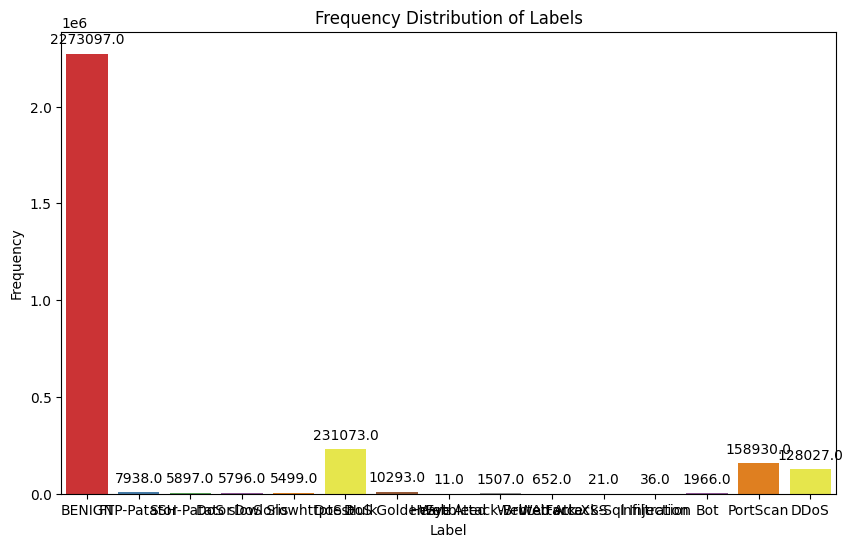

In [9]:
import seaborn as sns

import matplotlib.pyplot as plt
# Plot frequency distribution of all labels
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Label", data=df, palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}", xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Set title and axis labels
ax.set_title("Frequency Distribution of Labels")
ax.set_xlabel("Label")
ax.set_ylabel("Frequency")

plt.show()

In [10]:
labels

array(['BENIGN', 'FTP-Patator', 'SSH-Patator', 'DoS slowloris',
       'DoS Slowhttptest', 'DoS Hulk', 'DoS GoldenEye', 'Heartbleed',
       'Web Attack-Brute Force', 'Web Attack-XSS',
       'Web Attack-Sql Injection', 'Infiltration', 'Bot', 'PortScan',
       'DDoS'], dtype=object)

In [11]:
 df = df.drop(df[df['Label'].isin(['Infiltration', 'Web Attack-Sql Injection', 'Heartbleed','Bot','Web Attack-Brute Force','Web Attack-XSS'])].index)

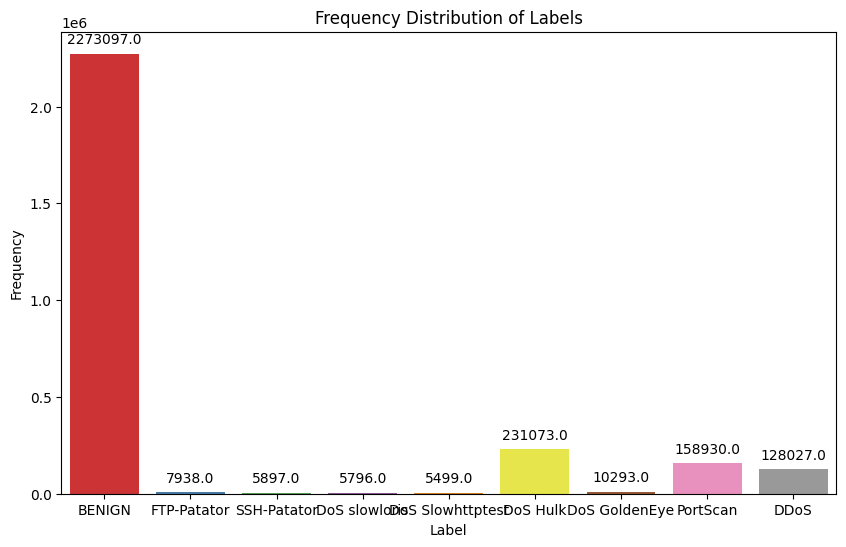

In [12]:
import seaborn as sns

import matplotlib.pyplot as plt
# Plot frequency distribution of all labels
f, ax = plt.subplots(figsize=(10, 6))
sns.countplot(x="Label", data=df, palette="Set1")

# Add labels to the bars
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f"{height}", xy=(p.get_x() + p.get_width() / 2, height),
                xytext=(0, 5), textcoords='offset points',
                ha='center', va='bottom')

# Set title and axis labels
ax.set_title("Frequency Distribution of Labels")
ax.set_xlabel("Label")
ax.set_ylabel("Frequency")

plt.show()

In [13]:
import os
import logging
logging.getLogger().setLevel(logging.INFO)
import pandas as pd
import numpy as np

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split


# Log setting
logging.basicConfig(format="%(asctime)s %(levelname)s %(message)s", datefmt="%H:%M:%S", level=logging.INFO)

# Change display.max_rows to show all features.
pd.set_option("display.max_rows", 85)

In [14]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df.Label = le.fit_transform(df.Label)




In [15]:
le.classes_

array(['BENIGN', 'DDoS', 'DoS GoldenEye', 'DoS Hulk', 'DoS Slowhttptest',
       'DoS slowloris', 'FTP-Patator', 'PortScan', 'SSH-Patator'],
      dtype=object)

In [16]:
import pandas as pd

def process_chunk(chunk):
  

    # Fill NaN with average value of each class in this dataset
    nan_rows = chunk[chunk.isna().any(axis=1)].shape[0]
    logging.info("Fill NaN in {} rows with average value of each class.".format(nan_rows))
    chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
    # Temporary replace inf with NaN
    chunk = chunk.replace([np.inf], np.nan)
    # Replace inf with maximum value of each class in this dataset
    chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.max()))

    # Change negative value with minimum positive value of each class
    logging.info("Replace negative values with minimum value of each class.")
    # Temporary replace negative value with NaN
    chunk[chunk < 0] = np.nan
    # Replace negative value with minimum value of each class in this dataset
    chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.min()))

    return chunk

# Set chunksize to read the dataset in chunks
chunksize = 100000
new_df = pd.DataFrame()

# Loop through the dataset in chunks
for i in range(0, len(df), chunksize):
    chunk = df.iloc[i:i+chunksize, :]    # Process each chunk using the function
    processed_chunk = process_chunk(chunk)
    chunk = chunk[(chunk.astype(float) <= 3.4028235e38).all(axis=1)]
    print(chunk.Label.unique())
    new_df = pd.concat([new_df, chunk])

new_df.Label.unique()


10:51:36 INFO Fill NaN in 16 rows with average value of each class.


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:36 INFO Replace negative values with minimum value of each class.
10:51:37 INFO Fill NaN in 12 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:37 INFO Replace negative values with minimum value of each class.
10:51:38 INFO Fill NaN in 8 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:38 INFO Replace negative values with minimum value of each class.
10:51:39 INFO Fill NaN in 11 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:39 INFO Replace negative values with minimum value of each class.
10:51:40 INFO Fill NaN in 15 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:40 INFO Replace negative values with minimum value of each class.
10:51:41 INFO Fill NaN in 37 rows with average value of each class.


[0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:42 INFO Replace negative values with minimum value of each class.
10:51:43 INFO Fill NaN in 40 rows with average value of each class.


[0 6]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:45 INFO Replace negative values with minimum value of each class.
10:51:45 INFO Fill NaN in 37 rows with average value of each class.


[0 6 8]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:47 INFO Replace negative values with minimum value of each class.
10:51:48 INFO Fill NaN in 54 rows with average value of each class.


[0 8]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:49 INFO Replace negative values with minimum value of each class.
10:51:50 INFO Fill NaN in 40 rows with average value of each class.


[0 8]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:52 INFO Replace negative values with minimum value of each class.
10:51:52 INFO Fill NaN in 134 rows with average value of each class.


[0 8 5]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:54 INFO Replace negative values with minimum value of each class.
10:51:55 INFO Fill NaN in 417 rows with average value of each class.


[0 5 4 3]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:56 INFO Replace negative values with minimum value of each class.
10:51:57 INFO Fill NaN in 404 rows with average value of each class.


[3 0]


C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:51:58 INFO Replace negative values with minimum value of each class.


[3 0]


10:52:00 INFO Fill NaN in 27 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:01 INFO Replace negative values with minimum value of each class.


[3 0 2]


10:52:02 INFO Fill NaN in 11 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:03 INFO Replace negative values with minimum value of each class.


[0 2]


10:52:05 INFO Fill NaN in 6 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:06 INFO Replace negative values with minimum value of each class.


[0 2]


10:52:07 INFO Fill NaN in 8 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:09 INFO Replace negative values with minimum value of each class.


[0 2]


10:52:10 INFO Fill NaN in 11 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:10 INFO Replace negative values with minimum value of each class.


[0]


10:52:11 INFO Fill NaN in 7 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:12 INFO Replace negative values with minimum value of each class.


[0]


10:52:12 INFO Fill NaN in 11 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:13 INFO Replace negative values with minimum value of each class.


[0]


10:52:13 INFO Fill NaN in 5 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:14 INFO Replace negative values with minimum value of each class.


[0]


10:52:15 INFO Fill NaN in 12 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:15 INFO Replace negative values with minimum value of each class.


[0]


10:52:16 INFO Fill NaN in 14 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:17 INFO Replace negative values with minimum value of each class.


[0]


10:52:17 INFO Fill NaN in 10 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:19 INFO Replace negative values with minimum value of each class.


[0 7]


10:52:20 INFO Fill NaN in 0 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:21 INFO Replace negative values with minimum value of each class.


[0 7]


10:52:22 INFO Fill NaN in 7 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:24 INFO Replace negative values with minimum value of each class.


[7 0]


10:52:25 INFO Fill NaN in 3 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:27 INFO Replace negative values with minimum value of each class.


[0 1]


10:52:28 INFO Fill NaN in 0 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:29 INFO Replace negative values with minimum value of each class.


[1 0]


10:52:31 INFO Fill NaN in 1 rows with average value of each class.
C:\Users\ASUS\AppData\Local\Temp\ipykernel_10032\3911524785.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  chunk.iloc[:, chunk.columns != "Label"] = chunk.groupby("Label").transform(lambda x: x.fillna(x.mean()))
10:52:31 INFO Replace negative values with minimum value of each class.


[0]


array([0, 6, 8, 5, 4, 3, 2, 7, 1])

In [17]:
logging.info("Class distribution\n{}".format(new_df.Label.value_counts()))

10:52:32 INFO Class distribution
0    2271320
3     230124
7     158804
1     128025
2      10293
6       7935
8       5897
5       5796
4       5499
Name: Label, dtype: int64


In [18]:
import pandas as pd


# Separate the benign traffic data
benign_data = new_df[new_df['Label'] == 0]

# Calculate the desired number of benign samples to keep (e.g., 10% of the original benign traffic)
desired_benign_samples = int(len(benign_data) * 0.11)

# Randomly sample the desired number of benign samples
sampled_benign_data = benign_data.sample(n=desired_benign_samples, random_state=42)

# Combine the sampled benign data with the non-benign data
filtered_dataset = pd.concat([sampled_benign_data, new_df[new_df['Label'] != 0]])

# Reset the index of the DataFrame
filtered_dataset.reset_index(drop=True, inplace=True)

# Save the filtered dataset to a new CSV file
filtered_dataset.to_csv('filtred_and_balanced_dataset.csv', index=False)